# Modelos AR(p) Ejemplo
Katlyn Goeujon-Mackness <br>
29/04/2025

## Objetivo
Explorar el concepto de modelos autoregresivos AR(p), con un enfoque particular en el modelo AR(1). Estos modelos utilizan valores pasados de una serie temporal para predecir futuros valores.

## Introducción 
**El modelo AR(1), o modelo autoregresivo de orden 1**, se utiliza en series de tiempo para predecir el valor actual de una variable basándose en su valor inmediatamente anterior. Es el modelo autoregresivo más básico y se utiliza como base para modelos más complejos, como AR(p) de órdenes superiores.

### Componentes
* media constante mu (𝜇)
* coeficiente phi (𝜙)
* término de error de ruido blanco

El modelo es especialmente útil para series temporales estacionarias donde 𝜙 está entre -1 y 1, con dos casos importantes:
1. 𝜙 positivo: Con "Momentum", genera una correlación positiva y un crecimiento que decae con el tiempo.
2. 𝜙 negativo: Con inversión de media, produce alternancias entre subidas y bajadas en las observaciones.


## Implementación
Utilizaremos librerías estadísticas para implementar modelos AR(1) en el análisis de precios de acciones. Veremos cómo ajustar modelos a datos de entrenamiento y realizar predicciones precisas.

In [1]:
# Importar librerías
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error

In [2]:
# Utiliza precios históricos de acciones de Apple extraídos de Yahoo Finance
apple = yf.download(tickers='aapl', start='2021-04-06', end='2023-04-06', rounding=True)
apple

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-04-06,123.46,124.36,122.92,123.75,80171300
2021-04-07,125.12,125.14,122.42,123.09,83466700
2021-04-08,127.52,127.55,125.72,126.14,88844600
2021-04-09,130.11,130.15,126.65,126.98,106686700
2021-04-12,128.38,129.96,127.79,129.64,91420000
...,...,...,...,...,...
2023-03-30,160.74,160.85,159.66,159.92,49501700
2023-03-31,163.25,163.35,160.29,160.82,68749800


In [3]:
apple = apple['Close']
apple

Ticker,AAPL
Date,
2021-04-06,123.46
2021-04-07,125.12
2021-04-08,127.52
2021-04-09,130.11
2021-04-12,128.38
...,...
2023-03-30,160.74
2023-03-31,163.25
2023-04-03,164.51


In [4]:
# Divide los datos en conjuntos de entrenamiento (80%) y prueba (20%)
apple.index = pd.to_datetime(apple.index)
len_train = int(len(apple)*0.8)
len_train

404

In [5]:
len_test = int(len(apple)*0.2)
len_test

101

In [6]:
# Definición de grupos de prueba y entrenamiento
train = apple[0:len_train]
train

Ticker,AAPL
Date,
2021-04-06,123.46
2021-04-07,125.12
2021-04-08,127.52
2021-04-09,130.11
2021-04-12,128.38
...,...
2022-11-02,143.13
2022-11-03,137.06
2022-11-04,136.79


In [7]:
test = apple[len_train:]
test

Ticker,AAPL
Date,
2022-11-09,133.32
2022-11-10,145.18
2022-11-11,147.98
2022-11-14,146.58
2022-11-15,148.32
...,...
2023-03-30,160.74
2023-03-31,163.25
2023-04-03,164.51


[1.         0.97625492 0.95361777 0.93385905 0.91674635 0.89920609
 0.87971804 0.8589679  0.83915256 0.82181023 0.80536115 0.79066464
 0.76991197 0.74988245 0.73089027 0.71191154 0.69504322 0.67681177
 0.65927228 0.64037373 0.6193495  0.59843302 0.57731415 0.55921781
 0.54065362 0.51826192 0.49573944]


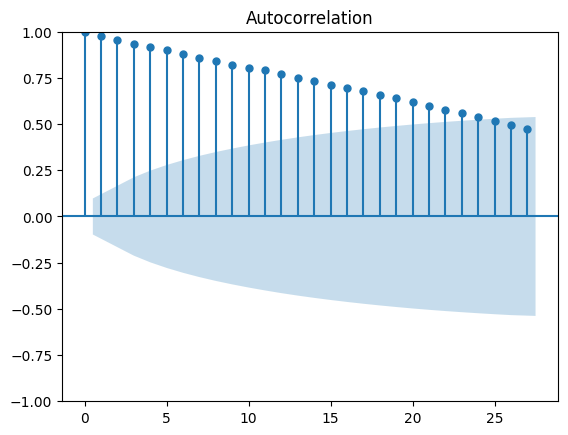

In [8]:
acf_array = acf(train)
print(acf_array)

# Gráfico con un nivel de confianza del 95%
plot_acf(train, alpha=0.05)
plt.show()

In [9]:
# Ajusta un modelo AR(1) con herramientas de Python, prediciendo los valores futuros
mod = ARIMA(train, order=(1,0,0))
res = mod.fit()

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [10]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  404
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -992.314
Date:                Tue, 29 Apr 2025   AIC                           1990.628
Time:                        20:22:02   BIC                           2002.632
Sample:                             0   HQIC                          1995.380
                                - 404                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.9926      6.549     22.140      0.000     132.157     157.828
ar.L1          0.9825      0.010    103.255      0.000       0.964       1.001
sigma2         7.8952      0.448     17.612      0.0

In [11]:
predicciones = res.forecast(len(test))
predicciones

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


404    138.024188
405    138.146201
406    138.266079
407    138.383857
408    138.499573
          ...    
500    143.714230
501    143.736614
502    143.758605
503    143.780212
504    143.801440
Name: predicted_mean, Length: 101, dtype: float64

In [12]:
# Calcula los intervales de confianza
conf = res.get_forecast(len(test)).conf_int(alpha=0.05)
conf

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,lower AAPL,upper AAPL
404,132.517018,143.531358
405,130.425771,145.866632
406,128.892449,147.639708
407,127.653346,149.114367
408,126.605211,150.393934
...,...,...
500,114.639589,172.788871
501,114.645034,172.828194
502,114.650684,172.866527
503,114.656525,172.903899


In [13]:
fcast_res = res.get_forecast(len(test))
print(fcast_res.summary_frame(alpha=0.05))

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


AAPL        mean    mean_se  mean_ci_lower  mean_ci_upper
404   138.024188   2.809832     132.517018     143.531358
405   138.146201   3.939068     130.425771     145.866632
406   138.266079   4.782552     128.892449     147.639708
407   138.383857   5.474851     127.653346     149.114367
408   138.499573   6.068664     126.605211     150.393934
..           ...        ...            ...            ...
500   143.714230  14.834273     114.639589     172.788871
501   143.736614  14.842916     114.645034     172.828194
502   143.758605  14.851253     114.650684     172.866527
503   143.780212  14.859297     114.656525     172.903899
504   143.801440  14.867058     114.662543     172.940338

[101 rows x 4 columns]


In [14]:
test = pd.DataFrame(test)
predicciones = pd.DataFrame(predicciones)
test = test.reset_index()
predicciones = predicciones.reset_index()

In [15]:
test

Ticker,Date,AAPL
0,2022-11-09,133.32
1,2022-11-10,145.18
2,2022-11-11,147.98
3,2022-11-14,146.58
4,2022-11-15,148.32
...,...,...
96,2023-03-30,160.74
97,2023-03-31,163.25
98,2023-04-03,164.51
99,2023-04-04,163.98


In [16]:
predicciones

,index,predicted_mean
0,404,138.024188
1,405,138.146201
2,406,138.266079
3,407,138.383857
4,408,138.499573
...,...,...
96,500,143.714230
97,501,143.736614
98,502,143.758605
99,503,143.780212


## Evaluación
Evaluaremos la precisión de los modelos AR(1) mediante métricas como el MSE y MAPE. 

In [17]:
acumulador1  = 0
acumulador2  = 0

for contador in range(0,101):
    acumulador1 = acumulador1 + (test.iloc[contador][1] - predicciones.iloc[contador][1]) ** 2
    acumulador2 = acumulador2 + np.abs((test.iloc[contador][1] - predicciones.iloc[contador][1]) / 
                                       test.iloc[contador][1])
    
mse = acumulador1 / 101
rmse = np.round(np.sqrt(mse),2)
mape = np.round((acumulador2 / 101) * 100,2)

print("RMSE:", rmse, "\nMAPE:", mape, "%")


RMSE: 9.6 
MAPE: 5.69 %


In [18]:
# Pronóstico de los siguientes 5 períodos posteriores al últimto dato histórico
predicciones = res.forecast(len(test) + 5)
predicciones.tail(5)

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


505    143.822297
506    143.842788
507    143.862921
508    143.882701
509    143.902135
Name: predicted_mean, dtype: float64

In [19]:
conf = res.get_forecast(len(test) + 5).conf_int(alpha=0.05)
conf

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,lower AAPL,upper AAPL
404,132.517018,143.531358
405,130.425771,145.866632
406,128.892449,147.639708
407,127.653346,149.114367
408,126.605211,150.393934
...,...,...
505,114.668724,172.975869
506,114.675057,173.010519
507,114.681530,173.044312
508,114.688130,173.077272


In [20]:
# Preparar datos de entrenamiento y prueba
train = pd.DataFrame(train)
lista = test['Date']
lista = pd.DataFrame(lista)
test.index = test['Date']
test.drop(columns=['Date'], inplace=True)
test

Ticker,AAPL
Date,
2022-11-09,133.32
2022-11-10,145.18
2022-11-11,147.98
2022-11-14,146.58
2022-11-15,148.32
...,...
2023-03-30,160.74
2023-03-31,163.25
2023-04-03,164.51


In [21]:
# Genera fechas de predicciones para los siguientes 5 días laborales
k = 5
lista2 = []
for day in range(1,6):
    fecha = ((pd.to_datetime("2023-04-05") + pd.offsets.BDay(day)).date())
    lista2.append(fecha)
lista2 = pd.DataFrame(lista2, columns=['Date'])
lista2['Date'] = pd.to_datetime(lista2['Date'])
lista2

,Date
0,2023-04-06
1,2023-04-07
2,2023-04-10
3,2023-04-11
4,2023-04-12


In [22]:
fechas = pd.concat([lista, lista2], ignore_index=True)
fechas = fechas.reset_index(drop=True)
fechas

,Date
0,2022-11-09
1,2022-11-10
2,2022-11-11
3,2022-11-14
4,2022-11-15
...,...
101,2023-04-06
102,2023-04-07
103,2023-04-10
104,2023-04-11


In [23]:
fechas.reset_index(drop=True, inplace=True)
fechas

,Date
0,2022-11-09
1,2022-11-10
2,2022-11-11
3,2022-11-14
4,2022-11-15
...,...
101,2023-04-06
102,2023-04-07
103,2023-04-10
104,2023-04-11


In [24]:
predicciones = pd.DataFrame(predicciones)
predicciones


,predicted_mean
404,138.024188
405,138.146201
406,138.266079
407,138.383857
408,138.499573
...,...
505,143.822297
506,143.842788
507,143.862921
508,143.882701


In [26]:
predicciones.reset_index(drop=True, inplace=True)
predicciones

,predicted_mean
0,138.024188
1,138.146201
2,138.266079
3,138.383857
4,138.499573
...,...
101,143.822297
102,143.842788
103,143.862921
104,143.882701


In [27]:
frames = [fechas, predicciones]
result = pd.concat(frames, axis=1, join = 'inner')
result.columns = ['Date', 'Predicciones']
result

,Date,Predicciones
0,2022-11-09,138.024188
1,2022-11-10,138.146201
2,2022-11-11,138.266079
3,2022-11-14,138.383857
4,2022-11-15,138.499573
...,...,...
101,2023-04-06,143.822297
102,2023-04-07,143.842788
103,2023-04-10,143.862921
104,2023-04-11,143.882701


In [28]:
result.index = result['Date']
result.drop(columns=['Date'], inplace=True)
result

,Predicciones
Date,
2022-11-09,138.024188
2022-11-10,138.146201
2022-11-11,138.266079
2022-11-14,138.383857
2022-11-15,138.499573
...,...
2023-04-06,143.822297
2023-04-07,143.842788
2023-04-10,143.862921


##  Validación y Visualización
Validaremos la adecuación del modelo utilizando criterios estadísticos y visualización gráfica.

In [29]:
# Calcular intervalos de confianza
conf = conf.reset_index()
conf.drop(columns=['index'], inplace=True)
conf

,lower AAPL,upper AAPL
0,132.517018,143.531358
1,130.425771,145.866632
2,128.892449,147.639708
3,127.653346,149.114367
4,126.605211,150.393934
...,...,...
101,114.668724,172.975869
102,114.675057,173.010519
103,114.681530,173.044312
104,114.688130,173.077272


In [30]:
# Combinar fechas y predicciones 
frames = [fechas, conf]
intervalos = pd.concat(frames, axis=1, join = 'inner')
intervalos

,Date,lower AAPL,upper AAPL
0,2022-11-09,132.517018,143.531358
1,2022-11-10,130.425771,145.866632
2,2022-11-11,128.892449,147.639708
3,2022-11-14,127.653346,149.114367
4,2022-11-15,126.605211,150.393934
...,...,...,...
101,2023-04-06,114.668724,172.975869
102,2023-04-07,114.675057,173.010519
103,2023-04-10,114.681530,173.044312
104,2023-04-11,114.688130,173.077272


In [31]:
intervalos.index = intervalos['Date']
intervalos.drop(columns=['Date'], inplace=True)
intervalos

,lower AAPL,upper AAPL
Date,,
2022-11-09,132.517018,143.531358
2022-11-10,130.425771,145.866632
2022-11-11,128.892449,147.639708
2022-11-14,127.653346,149.114367
2022-11-15,126.605211,150.393934
...,...,...
2023-04-06,114.668724,172.975869
2023-04-07,114.675057,173.010519
2023-04-10,114.681530,173.044312


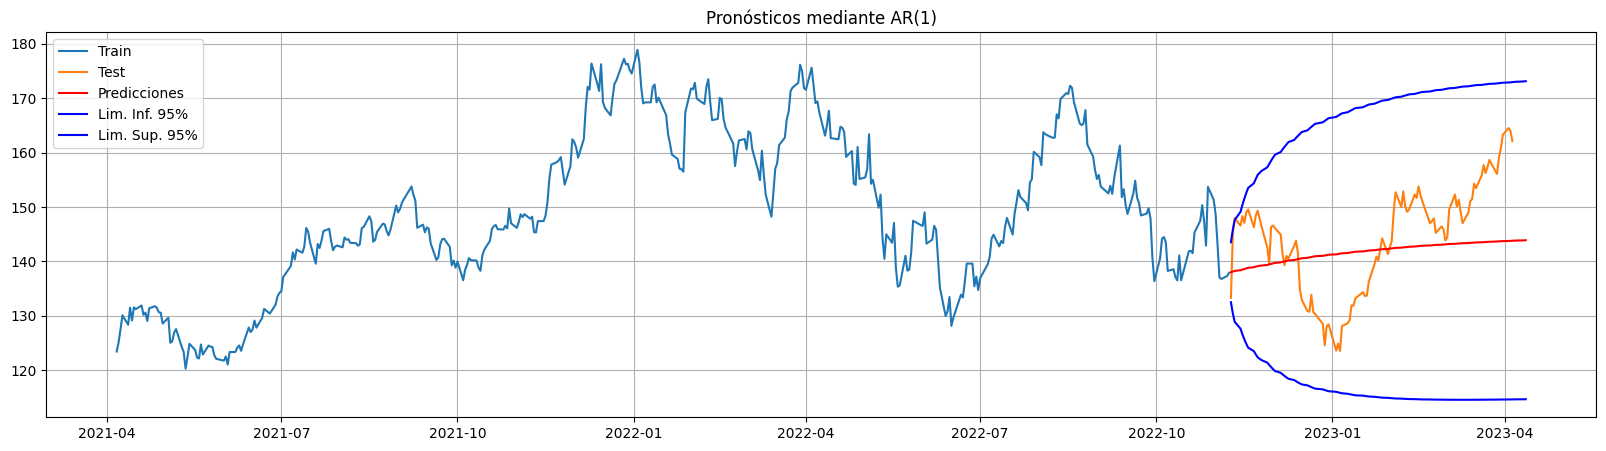

In [32]:
# Grafica los resultados
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(result, label = 'Predicciones', color = 'red')
plt.plot(intervalos['lower AAPL'], label = 'Lim. Inf. 95%', color='blue')
plt.plot(intervalos['upper AAPL'], label = 'Lim. Sup. 95%', color='blue')
plt.legend(loc='best')
plt.title('Pronósticos mediante AR(1)')
plt.show()

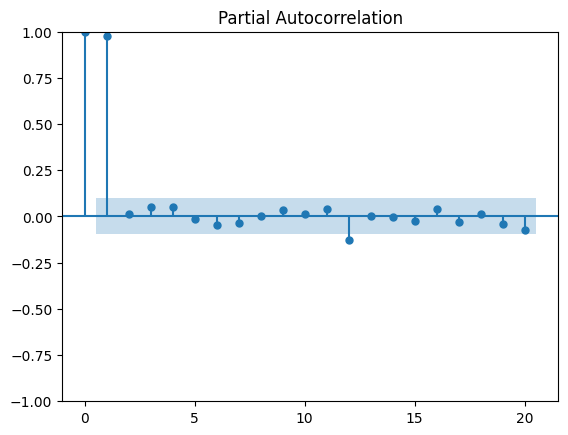

In [33]:
# Determinación del valor adecuado de p para AR(p) apartir de la función de Autocorrelación parcial
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train, lags=20)
plt.show()

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency inform

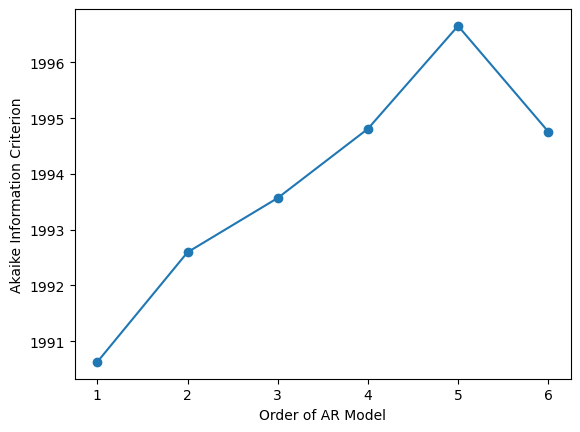

In [35]:
# Determinación del valor adadecuado de p para AR(p) apartir
#  del criterio de información Akaike

AIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(train, order=(p,0,0))
    res = mod.fit()
    AIC[p] = res.aic

# Plot the BIC as a function of p
plt.plot(range(1,7), AIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Akaike Information Criterion')
plt.show()

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency inform

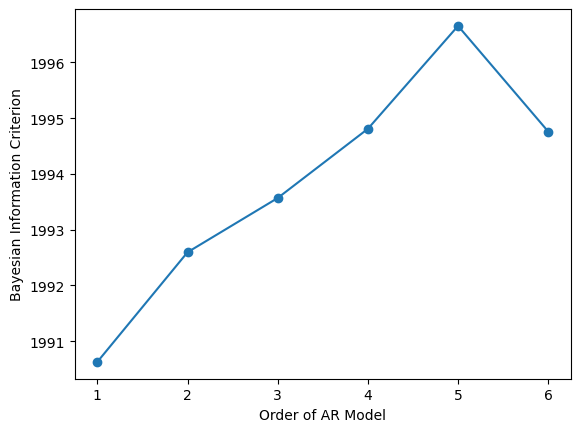

In [37]:
# Determinación del valor adadecuado de p para AR(p) apartir
#  del criterio de información Bayesiano

AIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(train, order=(p,0,0))
    res = mod.fit()
    AIC[p] = res.aic

# Plot the BIC as a function of p
plt.plot(range(1,7), AIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

Conclusión: En ambos índices se tiene el moenor valor para p=1. Se recomienda utilizar AR(1).